In [ ]:
# На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега 
#     с результатами двух тестов:

#     В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, 
#     либо новые квадратные 
    
#     Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый

# Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. 
# Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять 
# решения.

# Задания:

#     Выберите метод, который предположительно подойдет в первом вопросе.
    
#     Проверьте, являются ли дисперсии внутри групп гомогенными.
    
#     Проведите тест на нормальность распределения.
    
#     Сравните средние в представленных группах.
    
#     Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
    
#     Примите решение: какие картинки в итоге будем использовать?
        
#     Выберите метод для второго теста.
    
#     Визуализируйте распределение events для контрольной и тестовой групп. 
    
#     Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 
    
#     Выберите формулу для модели, проведите тест.

In [ ]:
#     Выберите метод, который предположительно подойдет в первом вопросе.

In [ ]:
ANOVA

In [ ]:
#     Проверьте, являются ли дисперсии внутри групп гомогенными.

In [55]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                        MultiComparison)
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
task_1 = pd.read_csv('5_task_1.csv')
task_1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [8]:
task_1.group.value_counts()

A    10000
B    10000
C    10000
Name: group, dtype: int64

In [13]:
group_A = task_1.query("group == 'A'").events
group_A

0       14
1       41
2       30
3       37
4       38
        ..
9995    25
9996    25
9997    30
9998    21
9999    21
Name: events, Length: 10000, dtype: int64

In [14]:
group_B = task_1.query("group == 'B'").events
group_B

10000    23
10001    30
10002    39
10003    44
10004    32
         ..
19995    46
19996    41
19997    26
19998    41
19999    45
Name: events, Length: 10000, dtype: int64

In [15]:
group_C = task_1.query("group == 'C'").events
group_C

20000    48
20001    24
20002    28
20003    30
20004    34
         ..
29995    38
29996    25
29997    34
29998    27
29999    49
Name: events, Length: 10000, dtype: int64

In [16]:
ss.levene(group_A, group_B, group_C)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [18]:
# или
pg.homoscedasticity(data=task_1, dv="events", group="group")

,W,pval,equal_var
levene,2.26226,0.104133,True


In [ ]:
p-value > 0.05, не отклоняем нулевую гипотезу, гомогенны

In [ ]:
#     Проведите тест на нормальность распределения.

In [19]:
ss.normaltest(group_A)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

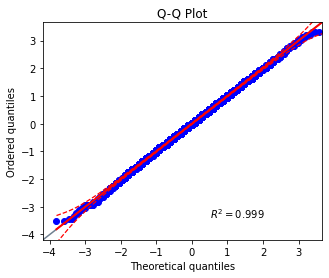

In [25]:
pg.qqplot(group_A)

In [23]:
ss.normaltest(group_B)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

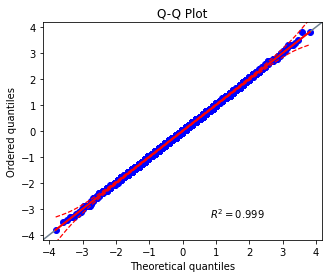

In [26]:
pg.qqplot(group_B)

In [21]:
ss.normaltest(group_C)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

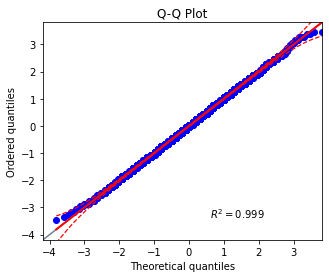

In [27]:
pg.qqplot(group_C)

In [ ]:
#     Сравните средние в представленных группах.

In [28]:
ss.f_oneway(group_A, group_B, group_C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [ ]:
#     Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

In [32]:
pairwise_tukeyhsd(task_1.events, task_1.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,-0.0,7.7038,8.3642,True
A,C,-2.1093,-0.0,-2.4395,-1.7791,True
B,C,-10.1433,-0.0,-10.4735,-9.8131,True


In [30]:
pg.pairwise_tukey(data=task_1, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.018089


In [31]:
pg.pairwise_gameshowell(data=task_1, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140920,-57.011134,19987.258491,6.412648e-13,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.141696,14.886135,19995.116233,6.349254e-12,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140062,72.420220,19995.502469,0.000000e+00,1.024138


In [ ]:
#     Примите решение: какие картинки в итоге будем использовать?

In [44]:
task_1 \
    .groupby('group', as_index=False) \
    .agg({'events': 'sum'}) \
    .sort_values('events')

,group,events
2,C,274703
0,A,295796
1,B,376136


In [35]:
pairwise_tukeyhsd(task_1.events, task_1.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,-0.0,7.7038,8.3642,True
A,C,-2.1093,-0.0,-2.4395,-1.7791,True
B,C,-10.1433,-0.0,-10.4735,-9.8131,True


In [ ]:
 B – Квадратные

In [ ]:
#     Выберите метод для второго теста. 

In [82]:
task_2 = pd.read_csv('5_task_2.csv')
task_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [41]:
task_2.group.value_counts()

test       50000
control    50000
Name: group, dtype: int64

In [42]:
task_2.segment.value_counts()

low     80000
high    20000
Name: segment, dtype: int64

In [ ]:
многофакторный дисперсионный анализ

In [ ]:
#     Визуализируйте распределение events для контрольной и тестовой групп. 

<AxesSubplot:xlabel='events', ylabel='Density'>

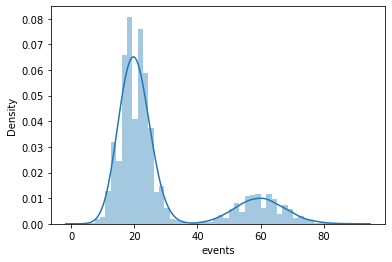

In [56]:
sns.distplot(task_2.query("group == 'control'").events)

<AxesSubplot:xlabel='events', ylabel='Density'>

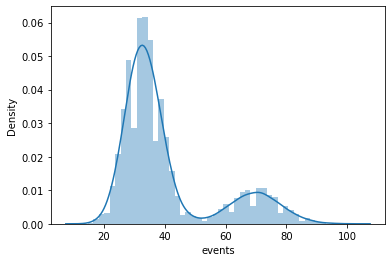

In [57]:
sns.distplot(task_2.query("group == 'test'").events)

In [ ]:
#     Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 

In [68]:
task_2 \
    .groupby(['group', 'segment'], as_index=False) \
    .agg({'events': ['mean', 'median', 'std']}) \
    .round(2)

group segment events             
                     mean median   std
0  control    high  59.97   60.0  7.81
1  control     low  20.03   20.0  4.47
2     test    high  69.94   70.0  8.40
3     test     low  33.03   33.0  5.72

In [69]:
task_2 \
    .groupby(['group', 'segment'], as_index=False) \
    .agg({'events': 'describe'}) \
    .round(2)

group segment   events                                            
                      count   mean   std   min   25%   50%   75%    max
0  control    high  10000.0  59.97  7.81  31.0  55.0  60.0  65.0   89.0
1  control     low  40000.0  20.03  4.47   4.0  17.0  20.0  23.0   41.0
2     test    high  10000.0  69.94  8.40  40.0  64.0  70.0  76.0  102.0
3     test     low  40000.0  33.03  5.72  13.0  29.0  33.0  37.0   59.0

In [ ]:
#     Выберите формулу для модели, проведите тест.

In [74]:
formula = 'events ~ group + segment + group:segment'
model = smf.ols(formula, data=task_2).fit()
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group:segment,3.664244e+04,1.0,1069.823274,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [75]:
pg.anova(data=task_2, dv="events", between=["group", "segment"])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [83]:
task_2['combination'] = task_2.group + '/' + task_2.segment
task_2

,id,group,segment,events,combination
0,83440,test,high,78.0,test/high
1,96723,test,high,71.0,test/high
2,68719,test,high,80.0,test/high
3,50399,test,high,80.0,test/high
4,95613,test,high,78.0,test/high
...,...,...,...,...,...
99995,60695,control,low,15.0,control/low
99996,5934,control,low,16.0,control/low
99997,30046,control,low,22.0,control/low
99998,26474,control,low,21.0,control/low


In [84]:
pairwise_tukeyhsd(task_2.events, task_2.combination).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control/high,control/low,-39.9392,-0.0,-40.1073,-39.7711,True
control/high,test/high,9.9677,-0.0,9.7551,10.1803,True
control/high,test/low,-26.9449,-0.0,-27.113,-26.7768,True
control/low,test/high,49.9069,-0.0,49.7388,50.075,True
control/low,test/low,12.9944,-0.0,12.888,13.1007,True
test/high,test/low,-36.9126,-0.0,-37.0807,-36.7445,True


<AxesSubplot:xlabel='group', ylabel='events'>

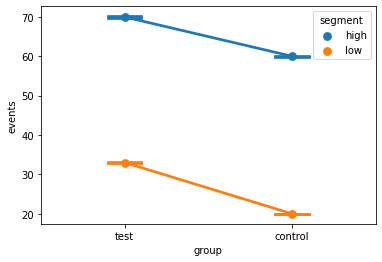

In [87]:
sns.pointplot(x="group", y="events", hue="segment", data=task_2, capsize=0.2)

In [ ]:
Фактор group оказался значимым, фактор segment – значимым, их взаимодействие – значимо. 
Судя по графику, для всех групп среднее значение events увеличилось, поэтому решение:
выкатываем новую версию.